# Epidimc simulation

## Basic Model

let $I(t)$ be the proportion of infected persons,

$S(t)$ the proportion of healthy person, 

and $R(t)$ the proportion of recovered person


The first basic model is :

$S'(t) = - \beta *S(t)*I(t) $ <br/>
$I'(t) = \beta *S(t)*I(t) - 1/\lambda * I(t) $ <br/>
$R'(t) = 1/\lambda * I(t) $


note that the differential system has a **null divergence**



Let $Y(t) \in R^3$ the following vector :
$$Y(t) = (S(t),I(t),R(t))^\top$$
and 
$$Y(0) = (1 - \epsilon ,\epsilon,0)^\top$$

where $  \frac{1}{N_{individus}} \le \epsilon \le 1 $


# Lets code

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import os
os.chdir(os.path.expanduser(".."))
from packages.models.SIR_models import base_sri_model

## resolution example

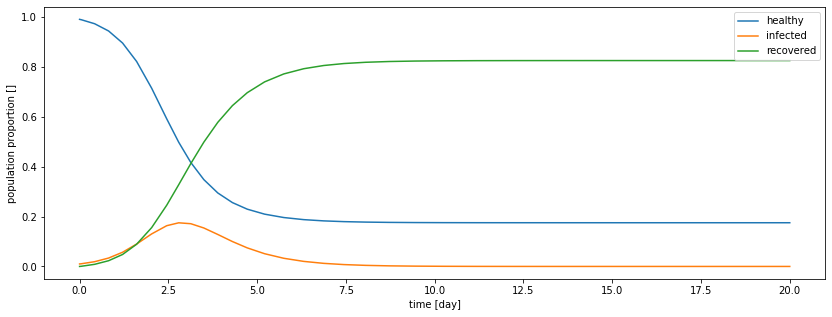

In [3]:
class first_epi_model(base_sri_model):
    labels=["healthy","infected","recovered"]
    epsilon=1e-2
    a= 0.7 # infection
    b=3 # recovering capatibility
    t_max=20
    y0 = np.array([1-epsilon,epsilon,0])

    def edp_model(self,t,y):
        inf_p = self.b*y[0]*y[1] #infected_people 
        r_p = 1/self.a * y[1]

        dydt = np.array([-inf_p,inf_p-r_p,r_p])
        return dydt
       
e = first_epi_model()
e.simulate()

# Advance model

lets add $D(t)$ the number of death

the system is now :  <br/>
$S'(t) = - \beta *S(t)*I(t) $ <br/>
$I'(t) = \beta *S(t)*I(t) - 1/\lambda * I(t)  - \mu*I(t)$ <br/>
$R'(t) = 1/\lambda* I(t) $ <br/>
$D'(t) = \mu*I(t)$

and 

$$Y(t) = (S(t),I(t),R(t),D(t))^\top$$


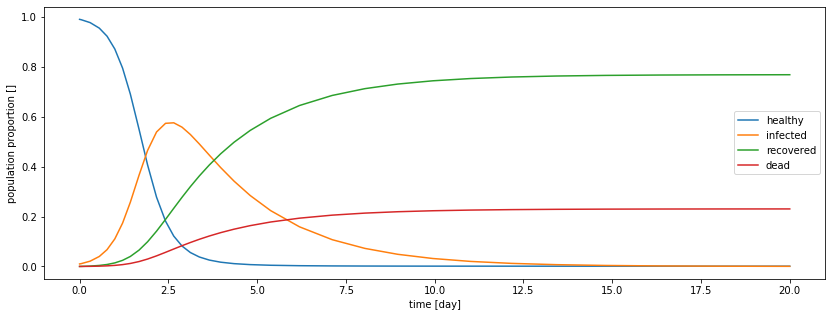

In [4]:
class second_epi_model(base_sri_model):
    labels=["healthy","infected","recovered","dead"]    
    epsilon=1e-2
    a=3
    b=3
    mu = 0.1
    t_max=20
    y0 = np.array([1-epsilon,epsilon,0,0])
    
    def edp_model(self,t,y):

        infected = self.b*y[0]*y[1] #infected_people 
        recovered = 1/self.a * y[1]

        dead =self.mu*y[1]

        dydt = np.array([-infected , infected-recovered - dead , recovered,dead])

        return dydt
    
e = second_epi_model()
e.simulate()

# incubation period

lets add $C(t)$ the number of of people who are infected but not sick yet

the system is now :  <br/>
$S'(t) = - \beta *S(t)*I(t) $ <br/>
$C'(t) = \beta *S(t)*I(t) - C/\nu $ <br/>
$I'(t) = C/\nu - 1/\lambda * I(t) $ <br/>
$R'(t) = 1/\lambda* I(t) $ <br/>
$D'(t) = \mu*I(t)$

and 

$$Y(t) = (S(t),I(t),R(t),D(t),C(t))^\top$$

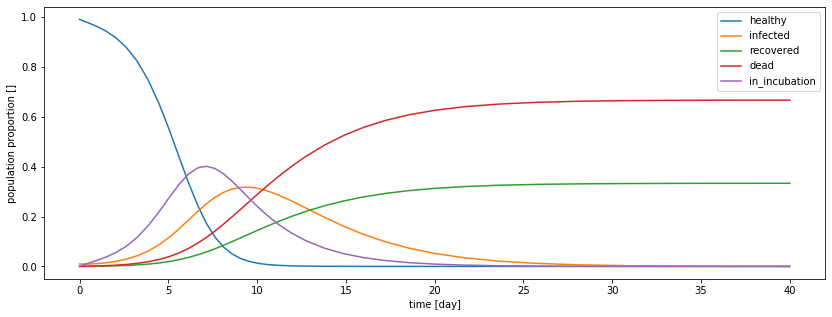

In [5]:
class third_epi_model(base_sri_model):
    labels=["healthy","infected","recovered","dead","in_incubation"]   
    epsilon=1e-2
    a=10
    b=3
    mu = 0.2
    v= 3
    t_max=40
    y0 = np.array([1-epsilon,epsilon,0,0,0])
    v= 3

    
    def edp_model(self,t,y):

        infected = self.b*y[0]*y[1] #infected_people 
        recovered = 1/self.a * y[1]

        dead =self.mu*y[1]
        sick = y[4]/self.v

        dydt = np.array([-infected ,sick-recovered - dead , recovered,dead,-sick+infected])

        return dydt
    
e = third_epi_model()
e.simulate()